## Problem Statement:

### Rain Prediction –Weather forecasting
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:

#### 1. Problem Statement:
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b) Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

In [1]:
!pip install imblearn

In [2]:
!pip install xgboost

### importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [5]:
# getting the shape
df.shape

(8425, 23)

In [6]:
# columns
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [8]:
# checking datatypes
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [9]:
# checking null values
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [10]:
# getting info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [11]:
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8350.000000  8365.000000  8185.000000  4913.000000  4431.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.403596     6.136408    10.459379     5.044484     3.896235   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.200000    19.300000     0.000000     2.600000     4.750000   
50%      13.300000    23.300000     0.000000     4.600000     8.700000   
75%      17.400000    28.000000     1.000000     7.000000    10.700000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    7434.000000   8349.000000   8318.000000  8366.000000  8323.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        14.665721     10.174579      9.766986    16.833283    18.423774   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        30.000000      6.000000     11.000000    56.000000    39.000000   
50%        39.000000     13.000000     19.000000    68.000000    51.000000   
75%        50.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  7116.000000  7113.000000  6004.000000  5970.000000  8369.000000   
mean   1017.640233  1015.236075     4.566622     4.503183    17.762015   
std       6.828699     6.766681     2.877658     2.731659     5.627035   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1013.000000  1010.400000     1.000000     2.000000    13.800000   
50%    1017.700000  1015.300000     5.000000     5.000000    17.800000   
75%    1022.300000  1019.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  8329.000000  
mean     22.442934  
std       5.980020  
min       7.300000  
25%      18.000000  
50%      21.900000  
75%      26.400000  
max      44.100000

in data set min temp is -2 and max temp is 28.5
in data set max temp almost 24 and highest max tempis 45.5

### segregating the data

In [12]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


In [13]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [14]:
numerical_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [15]:
def randomsampleimputation(df, variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [16]:
randomsampleimputation(df, "Cloud9am")
randomsampleimputation(df, "Cloud3pm")
randomsampleimputation(df, "Evaporation")
randomsampleimputation(df, "Sunshine")

In [17]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          3.0      13.8   
1     2008-12-02   Albury      7.4     25.1       0.0          2.2       7.6   
2     2008-12-03   Albury     12.9     25.7       0.0          4.6       7.7   
3     2008-12-04   Albury      9.2     28.0       0.0          1.8       8.0   
4     2008-12-05   Albury     17.5     32.3       1.0          3.8      11.9   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          6.4       1.2   
8421  2017-06-22    Uluru      3.6     25.3       0.0         12.6       7.1   
8422  2017-06-23    Uluru      5.4     26.9       0.0          4.2      13.0   
8423  2017-06-24    Uluru      7.8     27.0       0.0          4.0      13.1   
8424  2017-06-25    Uluru     14.9      NaN       0.0          8.4       4.4   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       8.0     16.9     21.8   
1          1010.6       1007.8       1.0       4.0     17.2     24.3   
2          1007.6       1008.7       2.0       2.0     21.0     23.2   
3          1017.6       1012.8       8.0       7.0     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       8.0       4.0     10.1     22.4   
8421       1023.5       1019.1       1.0       1.0     10.9     24.5   
8422       1021.0       1016.8       6.0       5.0     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

### checking correlation

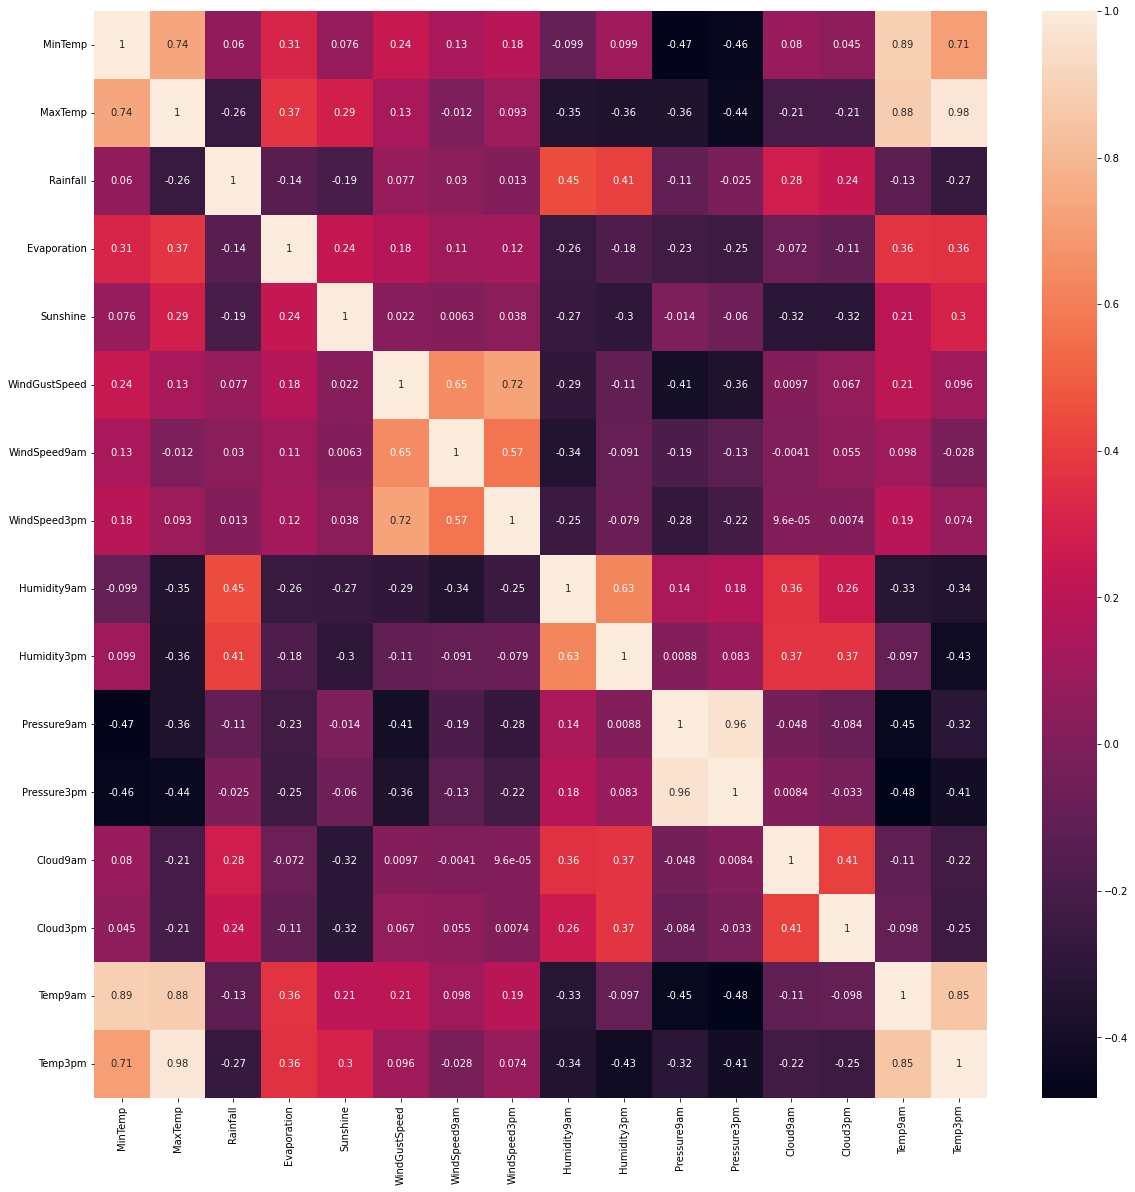

In [18]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True);

### Data Distribution

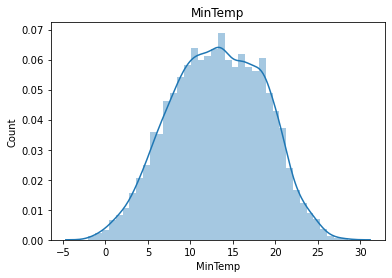

<Figure size 1080x1080 with 0 Axes>

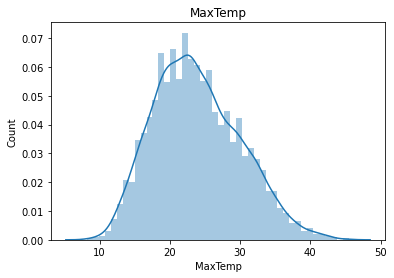

<Figure size 1080x1080 with 0 Axes>

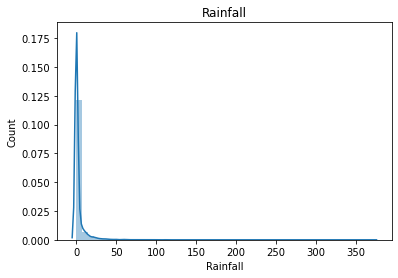

<Figure size 1080x1080 with 0 Axes>

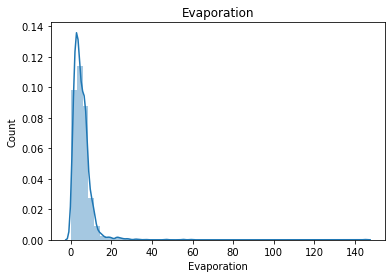

<Figure size 1080x1080 with 0 Axes>

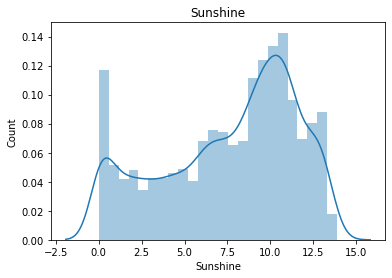

<Figure size 1080x1080 with 0 Axes>

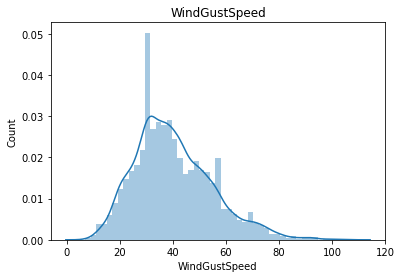

<Figure size 1080x1080 with 0 Axes>

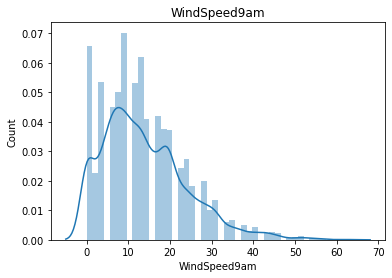

<Figure size 1080x1080 with 0 Axes>

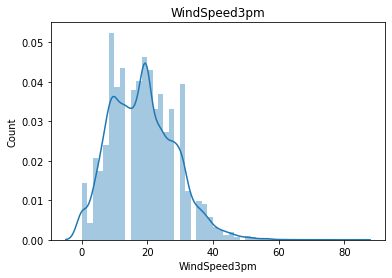

<Figure size 1080x1080 with 0 Axes>

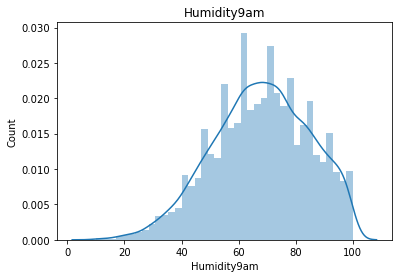

<Figure size 1080x1080 with 0 Axes>

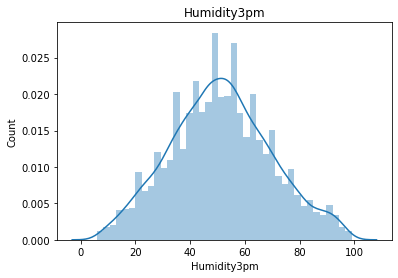

<Figure size 1080x1080 with 0 Axes>

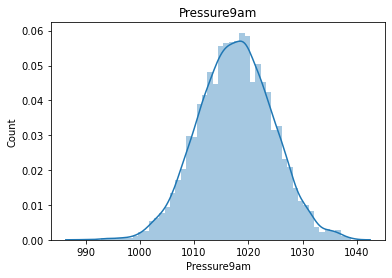

<Figure size 1080x1080 with 0 Axes>

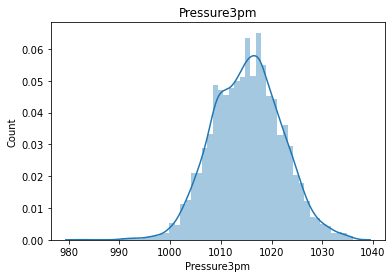

<Figure size 1080x1080 with 0 Axes>

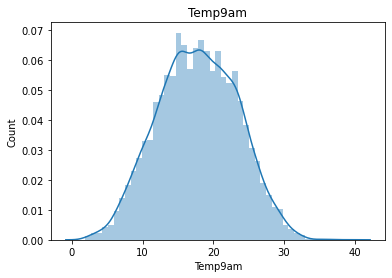

<Figure size 1080x1080 with 0 Axes>

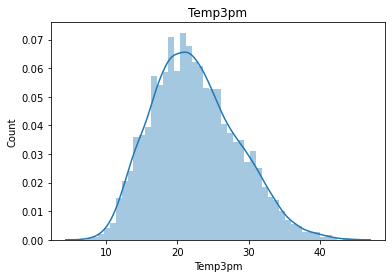

<Figure size 1080x1080 with 0 Axes>

In [19]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

### plotting Box plot for outliers

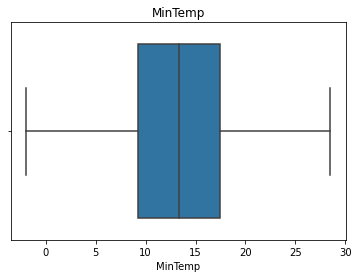

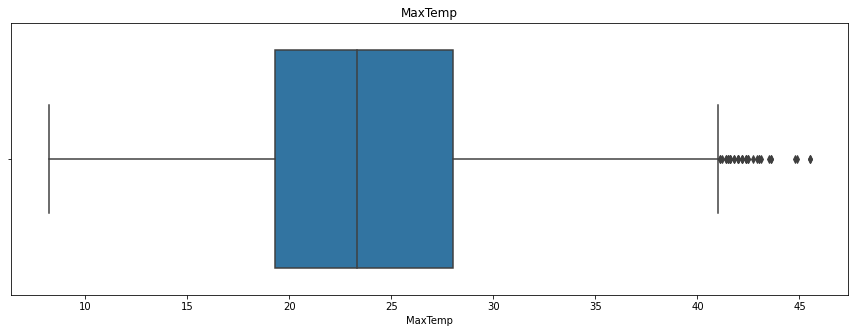

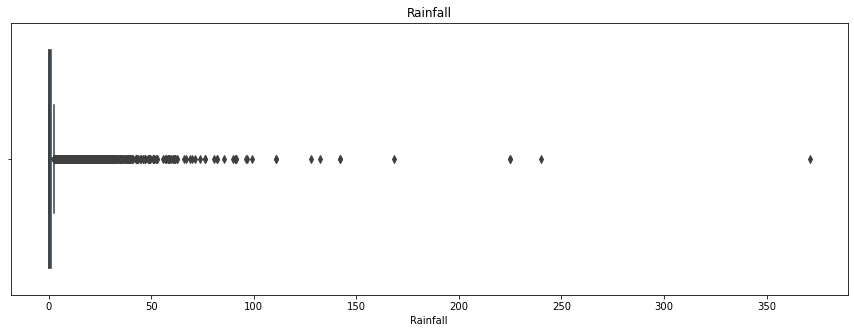

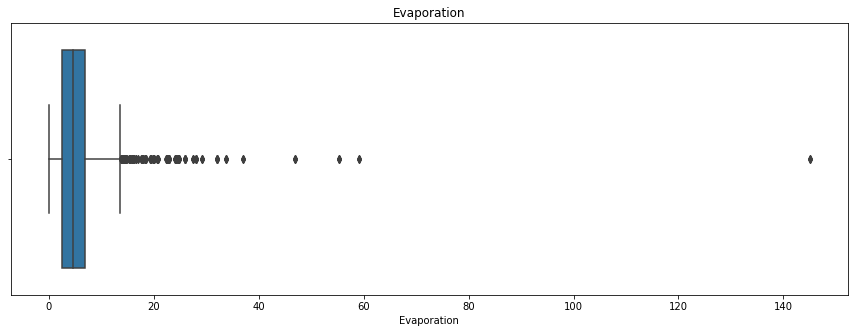

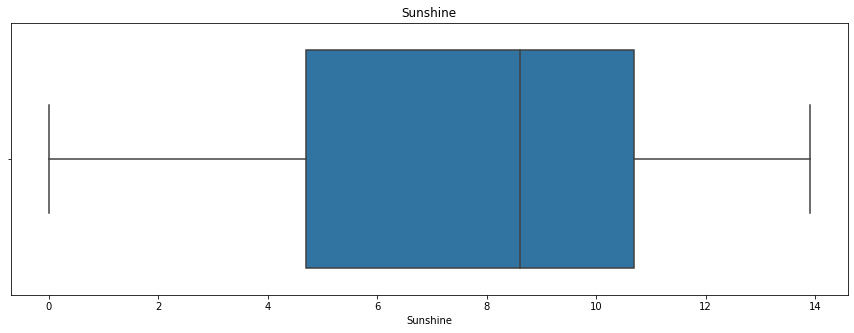

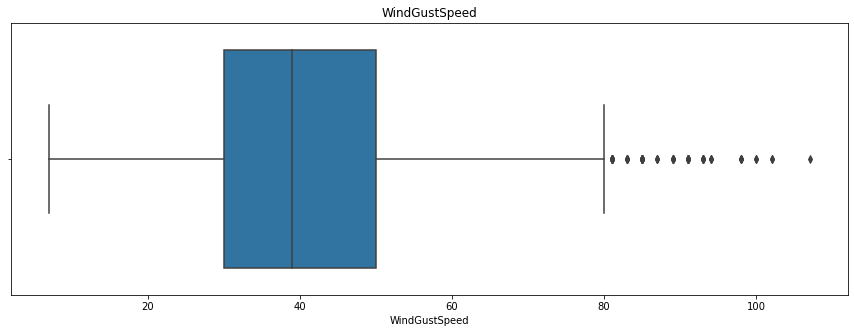

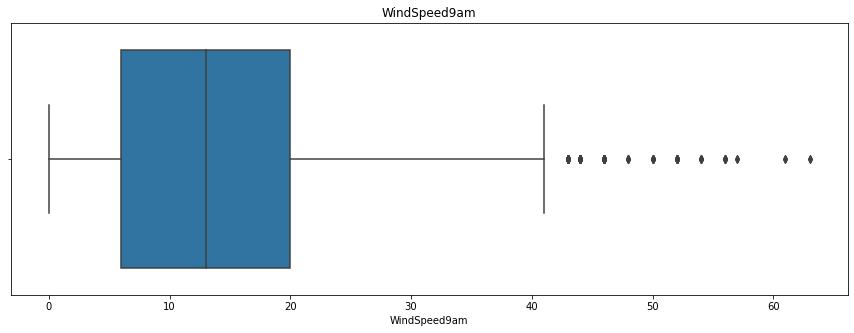

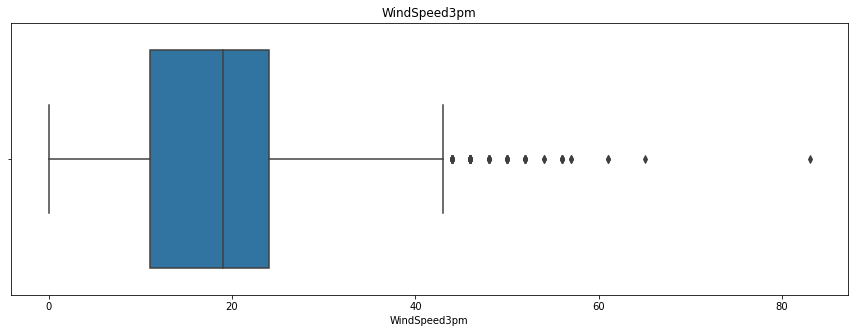

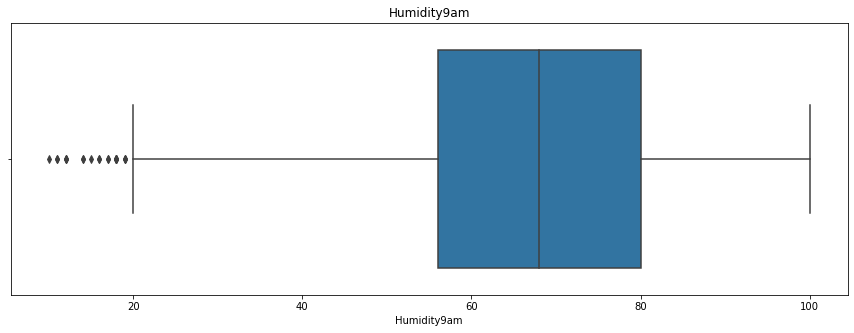

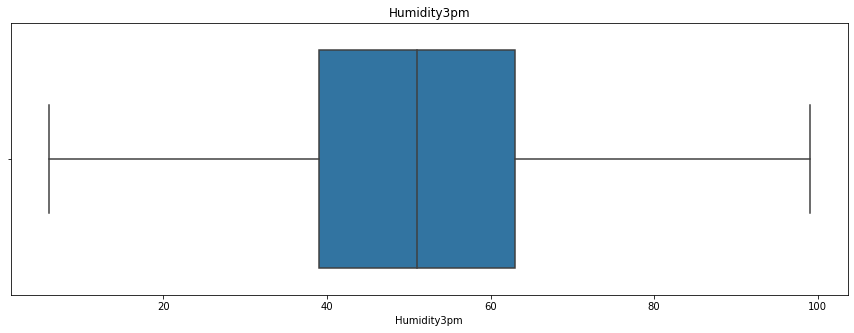

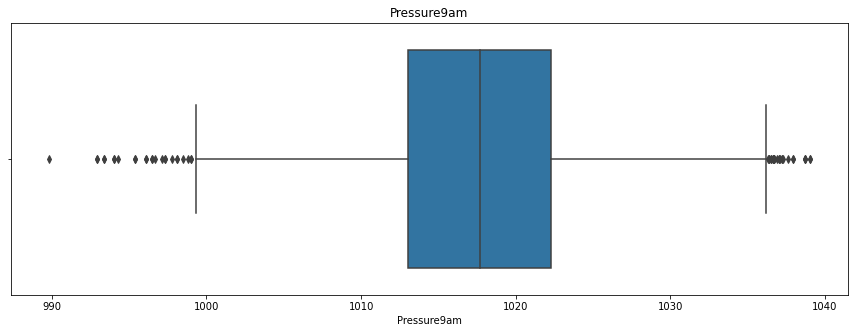

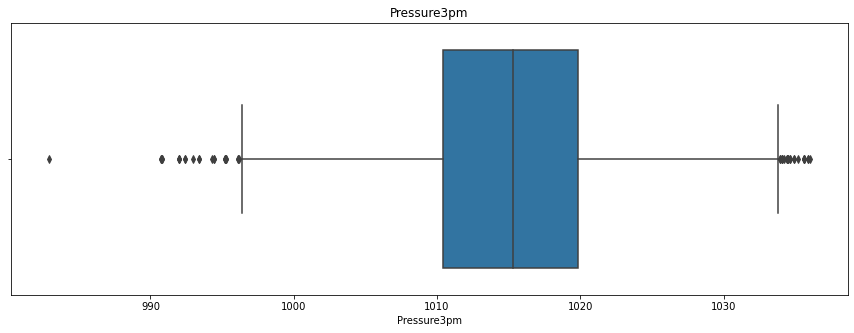

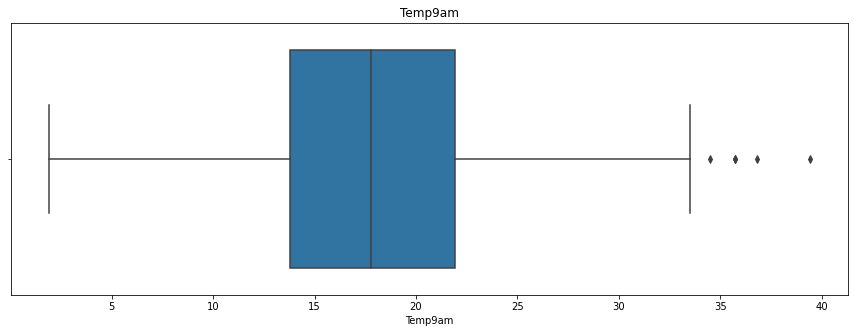

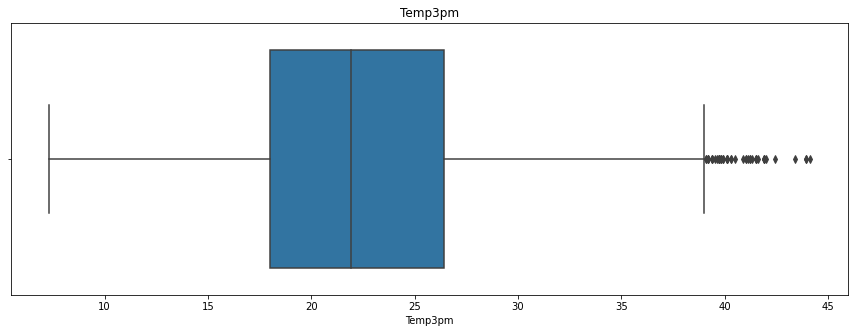

<Figure size 1080x360 with 0 Axes>

In [20]:
#for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,5));

In [21]:
#filling null values in continuous features
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

In [22]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation       0.000000
Sunshine          0.000000
WindGustDir      11.762611
WindGustSpeed     0.000000
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.000000
Humidity3pm       0.000000
Pressure9am       0.000000
Pressure3pm       0.000000
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           0.000000
Temp3pm           0.000000
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [23]:
discrete_feature

['Cloud9am', 'Cloud3pm']

In [24]:
# filling discreate features columns null values using MODE

def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode_nan(df,"Cloud9am")
mode_nan(df,"Cloud3pm")

### Encoding

In [25]:
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          3.0      13.8   
1     2008-12-02   Albury      7.4     25.1       0.0          2.2       7.6   
2     2008-12-03   Albury     12.9     25.7       0.0          4.6       7.7   
3     2008-12-04   Albury      9.2     28.0       0.0          1.8       8.0   
4     2008-12-05   Albury     17.5     32.3       1.0          3.8      11.9   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          6.4       1.2   
8421  2017-06-22    Uluru      3.6     25.3       0.0         12.6       7.1   
8422  2017-06-23    Uluru      5.4     26.9       0.0          4.2      13.0   
8423  2017-06-24    Uluru      7.8     27.0       0.0          4.0      13.1   
8424  2017-06-25    Uluru     14.9     23.3       0.0          8.4       4.4   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN           39.0        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       8.0     16.9     21.8   
1          1010.6       1007.8       1.0       4.0     17.2     24.3   
2          1007.6       1008.7       2.0       2.0     21.0     23.2   
3          1017.6       1012.8       8.0       7.0     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       8.0       4.0     10.1     22.4   
8421       1023.5       1019.1       1.0       1.0     10.9     24.5   
8422       1021.0       1016.8       6.0       5.0     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0             0             0  
1             0             0  
2             0             0  
3             0             0  
4             0             0  
...         ...           ...  
8420          0             0  
8421          0             0  
8422          0             0  
8423          0             0  
8424          0             0  

[8425 rows x 23 columns]

In [26]:
for feature in categorical_feature:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['2015-01-26', '2017-02-28', '2014-04-26', '2014-04-27', '2017-02-25',
       '2017-02-26', '2015-11-04', '2015-11-03', '2017-02-27', '2017-03-01',
       ...
       '2013-01-11', '2013-01-10', '2013-01-09', '2013-01-08', '2013-01-07',
       '2013-01-05', '2013-01-04', '2013-01-03', '2013-01-02', '2017-06-25'],
      dtype='object', name='Date', length=3004)
Location Index(['CoffsHarbour', 'Wollongong', 'Melbourne', 'Williamtown', 'Newcastle',
       'Penrith', 'Brisbane', 'Adelaide', 'Albury', 'PerthAirport', 'Darwin',
       'Uluru'],
      dtype='object', name='Location')
WindGustDir Index(['NNW', 'SSW', 'N', 'WSW', 'NW', 'SW', 'NNE', 'S', 'WNW', 'NE', 'SSE',
       'SE', 'ESE', 'W', 'ENE', 'E'],
      dtype='object', name='WindGustDir')
WindDir9am Index(['N', 'WNW', 'SW', 'W', 'NNE', 'NNW', 'SSW', 'ESE', 'WSW', 'S', 'NW',
       'NE', 'SSE', 'SE', 'ENE', 'E'],
      dtype='object', name='WindDir9am')
WindDir3pm Index(['NNW', 'SSW', 'N', 'NW', 'S', 'WSW', 'SW', 'NNE', 'S

In [27]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

In [28]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

In [29]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [30]:
df1 = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()

In [31]:
df1

RainTomorrow       0      1
Location                   
Adelaide       160.0   45.0
Albury         708.0  199.0
Brisbane       444.0  135.0
CoffsHarbour   425.0  186.0
Darwin         218.0   32.0
Melbourne     1216.0  406.0
Newcastle      624.0  198.0
Penrith        366.0  116.0
PerthAirport   962.0  242.0
Uluru           39.0    NaN
Williamtown    924.0  306.0
Wollongong     348.0  126.0

In [32]:
df1[1].sort_values(ascending = False)

Location
Melbourne       406.0
Williamtown     306.0
PerthAirport    242.0
Albury          199.0
Newcastle       198.0
CoffsHarbour    186.0
Brisbane        135.0
Wollongong      126.0
Penrith         116.0
Adelaide         45.0
Darwin           32.0
Uluru             NaN
Name: 1, dtype: float64

In [33]:
df1[1].sort_values(ascending = False).index

Index(['Melbourne', 'Williamtown', 'PerthAirport', 'Albury', 'Newcastle',
       'CoffsHarbour', 'Brisbane', 'Wollongong', 'Penrith', 'Adelaide',
       'Darwin', 'Uluru'],
      dtype='object', name='Location')

In [34]:
len(df1[1].sort_values(ascending = False).index)

12

In [35]:
location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
df["Location"] = df["Location"].map(location)

In [36]:

df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%dT", errors = "coerce")

In [37]:
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day

In [38]:
df

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0    2008-12-01        30     13.4     22.9       0.6          3.0      13.8   
1    2008-12-02        30      7.4     25.1       0.0          2.2       7.6   
2    2008-12-03        30     12.9     25.7       0.0          4.6       7.7   
3    2008-12-04        30      9.2     28.0       0.0          1.8       8.0   
4    2008-12-05        30     17.5     32.3       1.0          3.8      11.9   
...         ...       ...      ...      ...       ...          ...       ...   
8420 2017-06-21        49      2.8     23.4       0.0          6.4       1.2   
8421 2017-06-22        49      3.6     25.3       0.0         12.6       7.1   
8422 2017-06-23        49      5.4     26.9       0.0          4.2      13.0   
8423 2017-06-24        49      7.8     27.0       0.0          4.0      13.1   
8424 2017-06-25        49     14.9     23.3       0.0          8.4       4.4   

      WindGustDir  WindGustSpeed  WindDir9am  ...  Pressure9am  Pressure3pm  \
0             4.0           44.0         5.0  ...       1007.7       1007.1   
1             2.0           44.0         0.0  ...       1010.6       1007.8   
2             5.0           46.0         5.0  ...       1007.6       1008.7   
3            11.0           24.0        13.0  ...       1017.6       1012.8   
4             4.0           41.0        12.0  ...       1010.8       1006.0   
...           ...            ...         ...  ...          ...          ...   
8420         15.0           31.0        13.0  ...       1024.6       1020.3   
8421          0.0           22.0        13.0  ...       1023.5       1019.1   
8422          3.0           37.0        13.0  ...       1021.0       1016.8   
8423         12.0           28.0        11.0  ...       1019.4       1016.5   
8424          3.0           39.0        14.0  ...       1020.2       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0          8.0       8.0     16.9     21.8          0             0   
1          1.0       4.0     17.2     24.3          0             0   
2          2.0       2.0     21.0     23.2          0             0   
3          8.0       7.0     18.1     26.5          0             0   
4          7.0       8.0     17.8     29.7          0             0   
...        ...       ...      ...      ...        ...           ...   
8420       8.0       4.0     10.1     22.4          0             0   
8421       1.0       1.0     10.9     24.5          0             0   
8422       6.0       5.0     12.5     26.1          0             0   
8423       3.0       2.0     15.1     26.0          0             0   
8424       8.0       8.0     15.0     20.9          0             0   

      Date_month  Date_day  
0             12         1  
1             12         2  
2             12         3  
3             12         4  
4             12         5  
...          ...       ...  
8420           6        21  
8421           6        22  
8422           6        23  
8423           6        24  
8424           6        25  

[8425 rows x 25 columns]

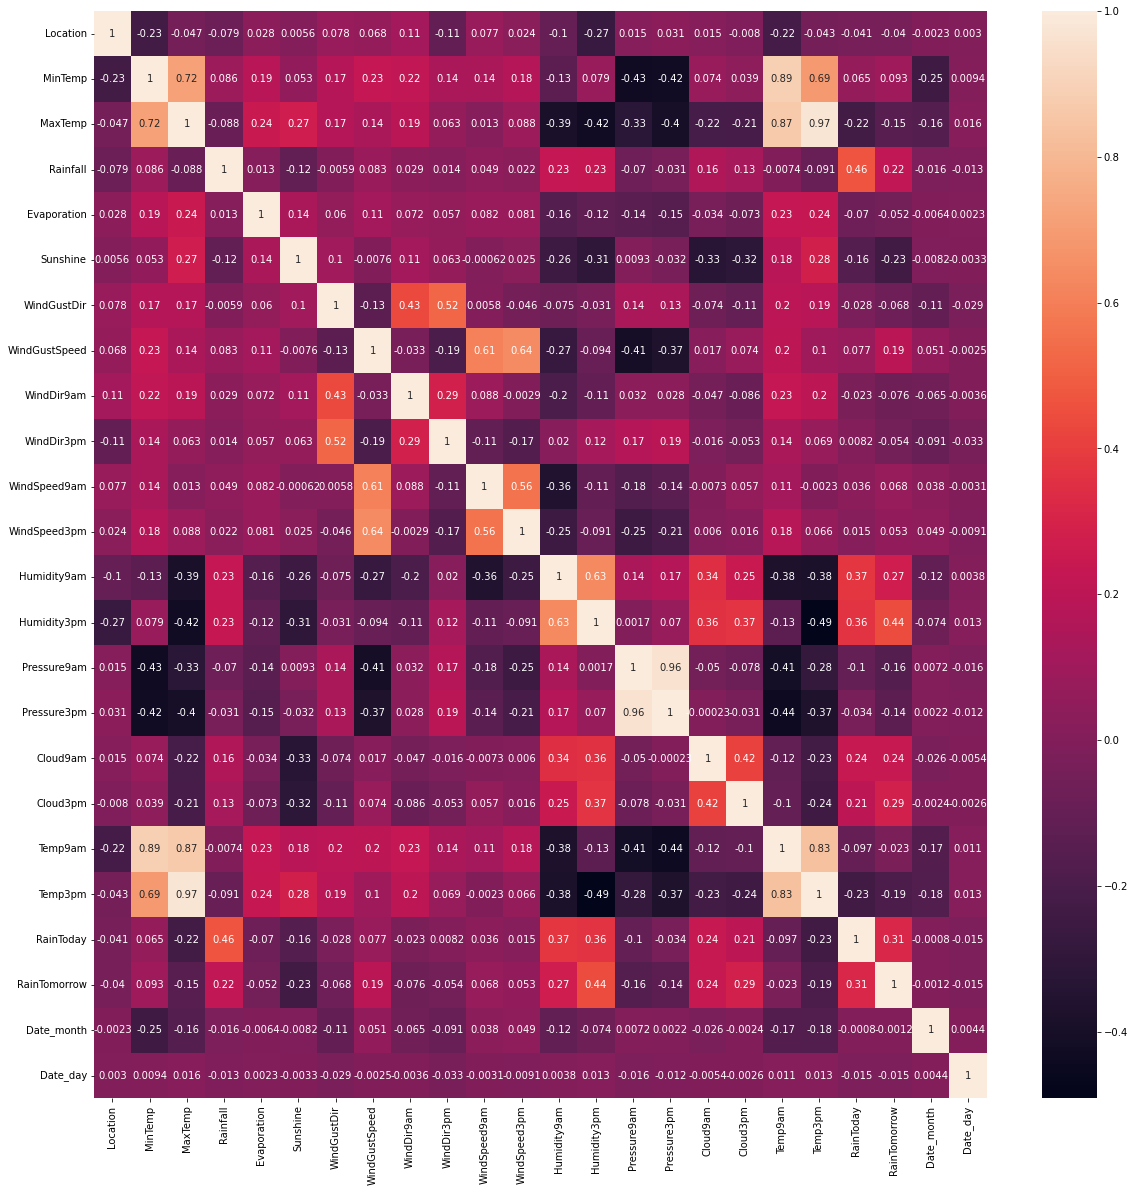

In [39]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True);

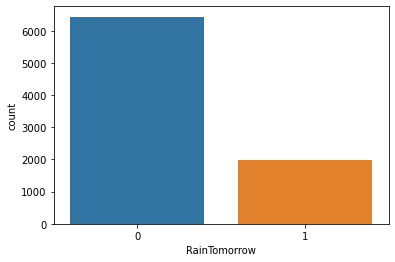

In [40]:
sns.countplot(df["RainTomorrow"]);


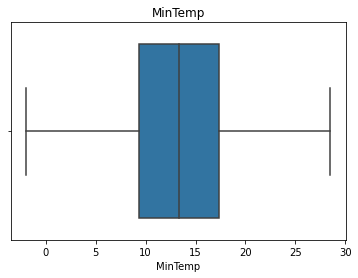

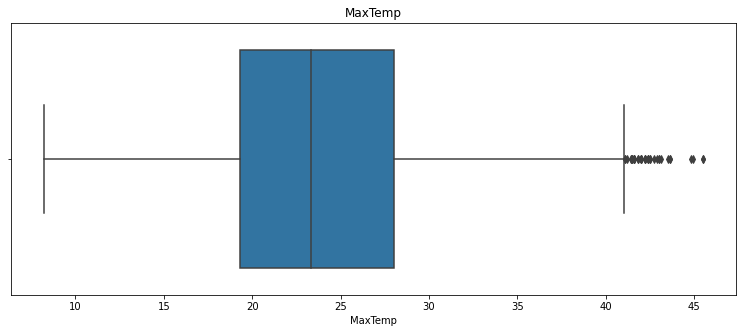

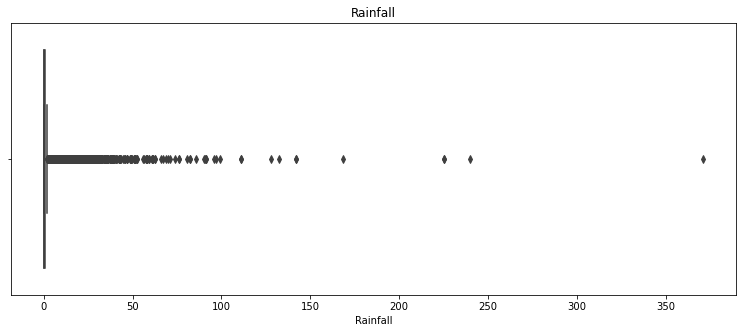

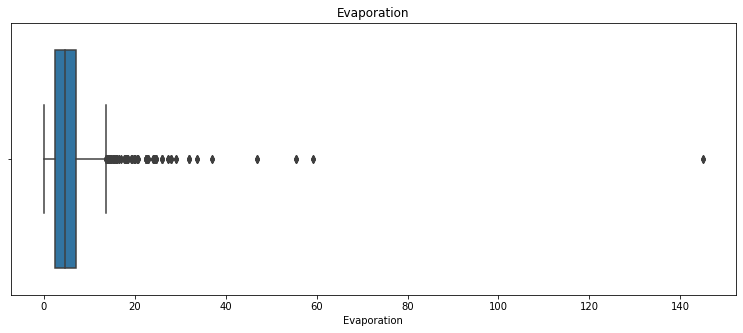

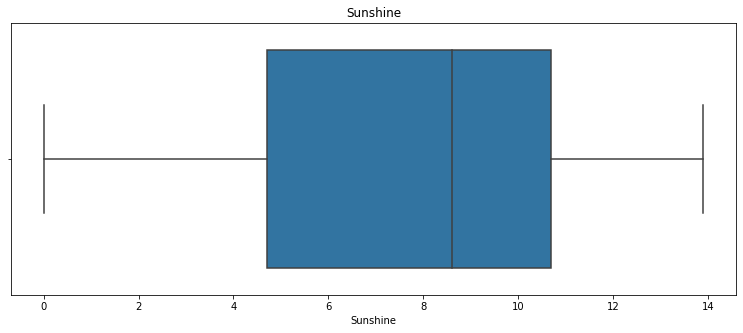

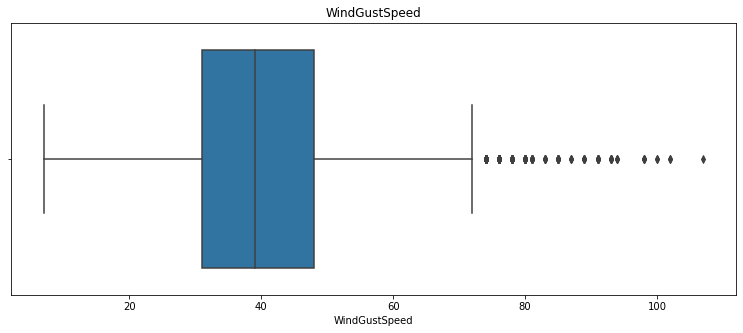

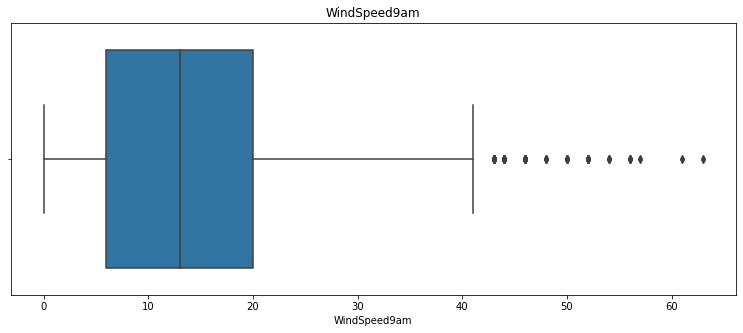

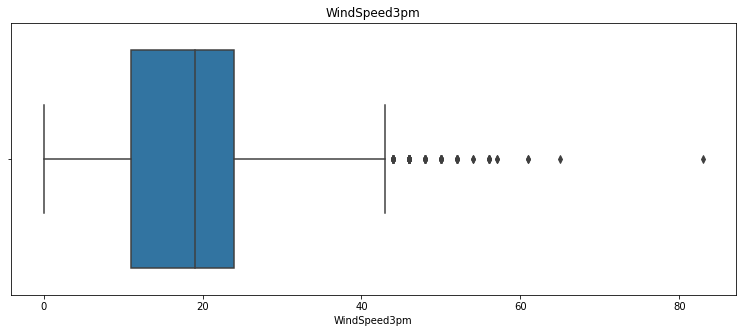

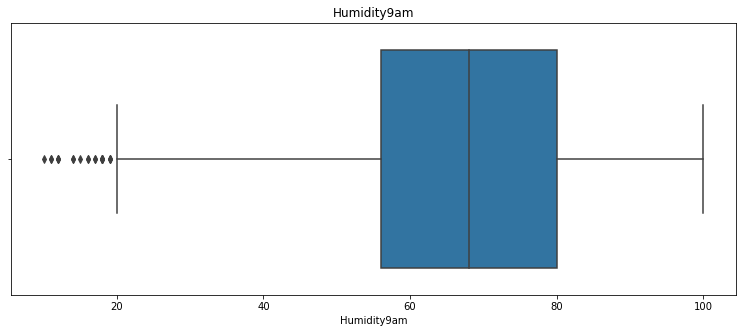

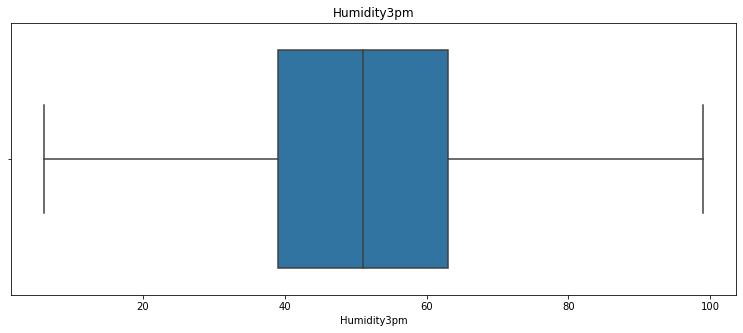

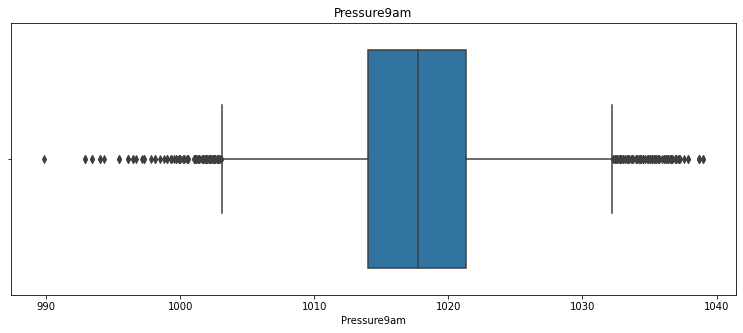

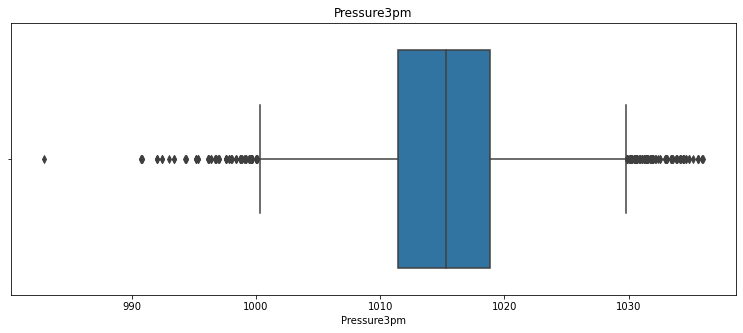

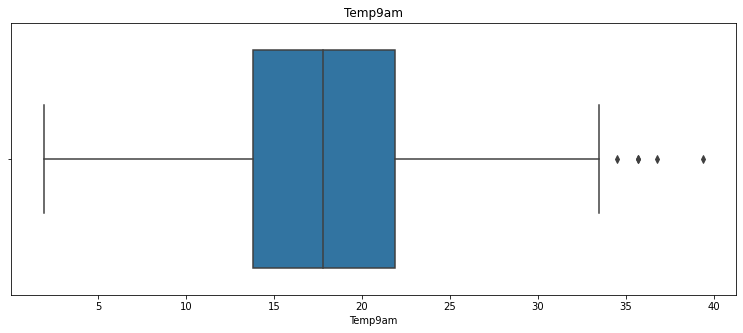

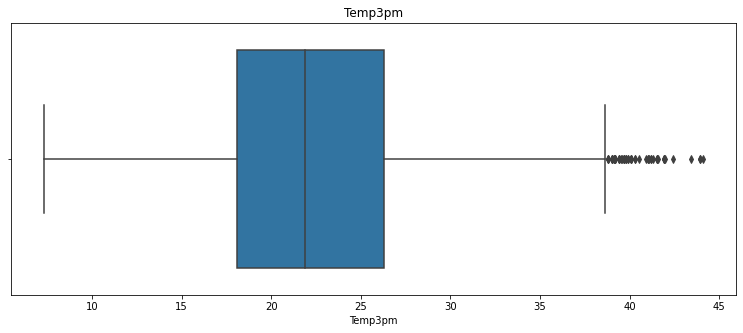

<Figure size 936x360 with 0 Axes>

In [41]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(13,5));

In [42]:
for feature in continuous_feature:
    print(feature)

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Temp9am
Temp3pm


### Removing Outliers

In [43]:
IQR=df.MinTemp.quantile(0.75)-df.MinTemp.quantile(0.25)
lower_bridge=df.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-2.6999999999999993 29.3


In [44]:
df.loc[df['MinTemp']>=30.45,'MinTemp']=30.45
df.loc[df['MinTemp']<=-5.95,'MinTemp']=-5.95

In [45]:
IQR=df.MaxTemp.quantile(0.75)-df.MaxTemp.quantile(0.25)
lower_bridge=df.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

6.250000000000002 41.05


In [46]:
df.loc[df['MaxTemp']>=43.5,'MaxTemp']=43.5
df.loc[df['MaxTemp']<=2.7,'MaxTemp']=2.7

In [47]:
IQR=df.Rainfall.quantile(0.75)-df.Rainfall.quantile(0.25)
lower_bridge=df.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1.2000000000000002 2.0


In [48]:
df.loc[df['Rainfall']>=1.5,'Rainfall']=1.5
df.loc[df['Rainfall']<=-0.89,'Rainfall']=-0.89

In [49]:
IQR=df.Evaporation.quantile(0.75)-df.Evaporation.quantile(0.25)
lower_bridge=df.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-4.0 13.600000000000001


In [50]:
df.loc[df['Evaporation']>=14.6,'Evaporation']=14.6
df.loc[df['Evaporation']<=-4.6,'Evaporation']=-4.6

In [51]:
IQR=df.WindGustSpeed.quantile(0.75)-df.WindGustSpeed.quantile(0.25)
lower_bridge=df.WindGustSpeed.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

5.5 73.5


In [52]:
df.loc[df['WindGustSpeed']>=68.5,'WindGustSpeed']=68.5
df.loc[df['WindGustSpeed']<=8.5,'WindGustSpeed']=8.5

In [53]:
IQR=df.WindSpeed9am.quantile(0.75)-df.WindSpeed9am.quantile(0.25)
lower_bridge=df.WindSpeed9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-15.0 41.0


In [54]:
df.loc[df['WindSpeed9am']>=37,'WindSpeed9am']=37
df.loc[df['WindSpeed9am']<=-11,'WindSpeed9am']=-11

In [55]:
IQR=df.WindSpeed3pm.quantile(0.75)-df.WindSpeed3pm.quantile(0.25)
lower_bridge=df.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-8.5 43.5


In [56]:
df.loc[df['WindSpeed3pm']>40.5,'WindSpeed3pm']=40.5
df.loc[df['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5

In [57]:
IQR=df.Humidity9am.quantile(0.75)-df.Humidity9am.quantile(0.25)
lower_bridge=df.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

20.0 116.0


In [58]:
df.loc[df['Humidity9am']>=122,'Humidity9am']=122
df.loc[df['Humidity9am']<=18,'Humidity9am']=18

In [59]:
IQR=df.Pressure9am.quantile(0.75)-df.Pressure9am.quantile(0.25)
lower_bridge=df.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1003.0500000000001 1032.25


In [60]:
df.loc[df['Pressure9am']>=1034.25,'Pressure9am']=1034.25
df.loc[df['Pressure9am']<=1001.05,'Pressure9am']=1001.05

In [61]:
IQR=df.Pressure3pm.quantile(0.75)-df.Pressure3pm.quantile(0.25)
lower_bridge=df.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1000.3 1029.8999999999999


In [62]:
df.loc[df['Pressure3pm']>=1031.85,'Pressure3pm']=1031.85
df.loc[df['Pressure3pm']<=998.65,'Pressure3pm']=998.65

In [63]:
IQR=df.Temp9am.quantile(0.75)-df.Temp9am.quantile(0.25)
lower_bridge=df.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1.650000000000004 34.05


In [64]:
df.loc[df['Temp9am']>=35.3,'Temp9am']=35.3
df.loc[df['Temp9am']<=-1.49,'Temp9am']=-1.49

In [65]:
IQR=df.Temp3pm.quantile(0.75)-df.Temp3pm.quantile(0.25)
lower_bridge=df.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

5.8000000000000025 38.6


In [66]:
df.loc[df['Temp3pm']>=40.45,'Temp3pm']=40.45
df.loc[df['Temp3pm']<=2.45,'Temp3pm']=2.45

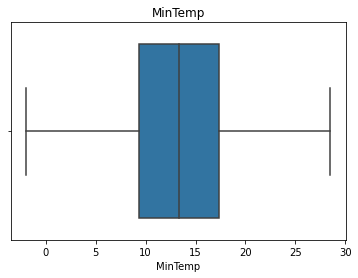

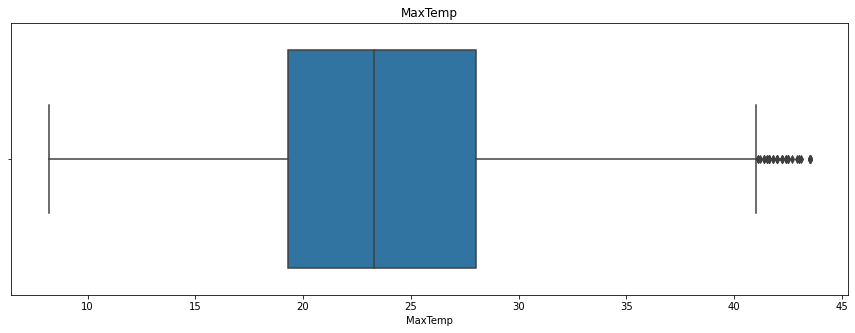

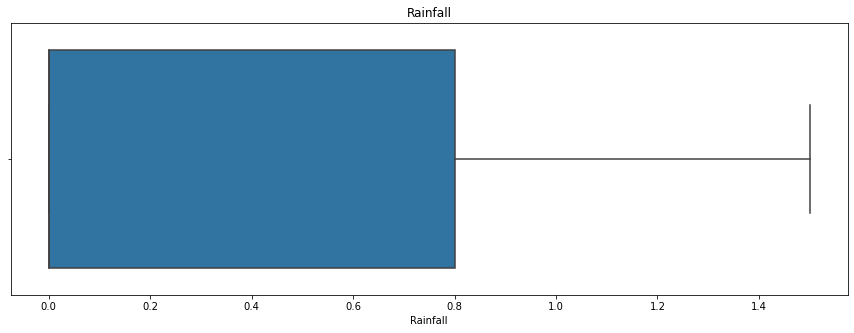

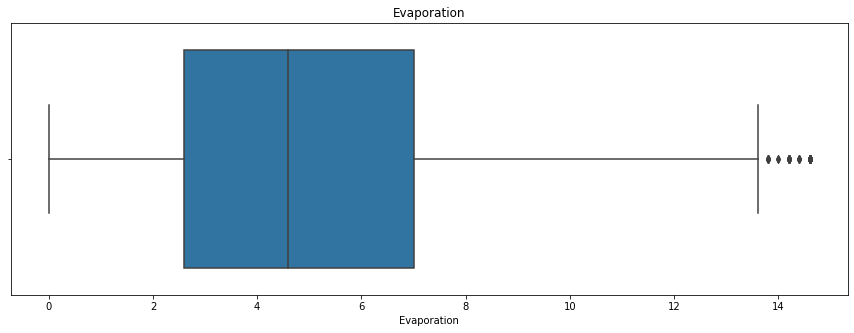

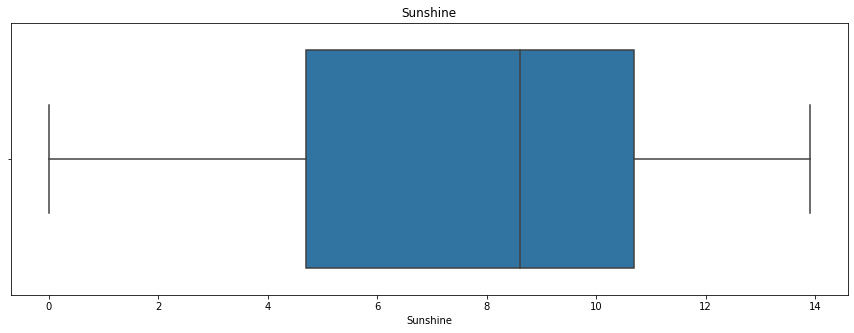

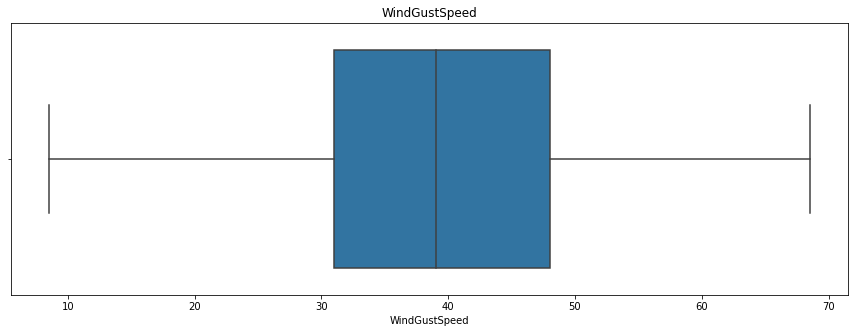

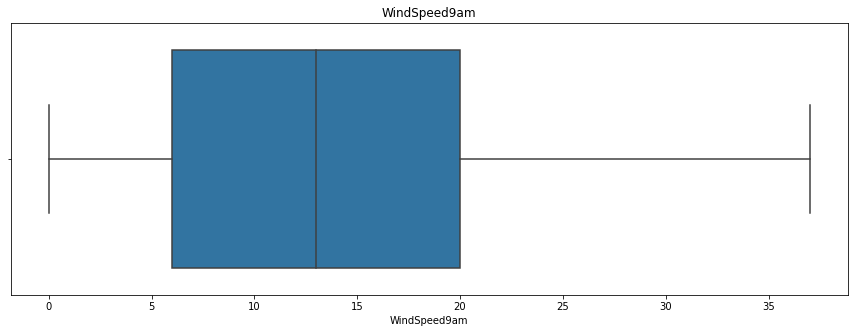

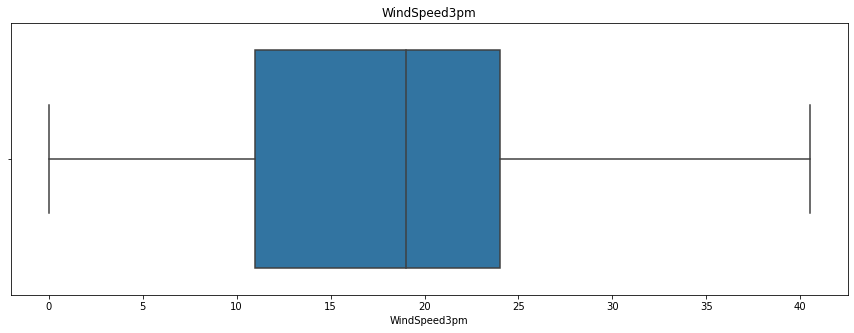

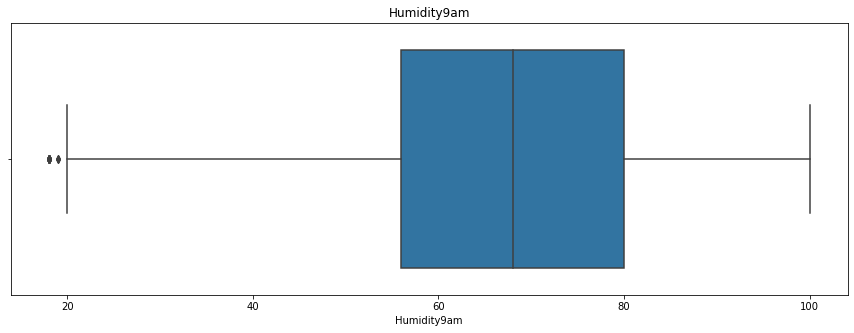

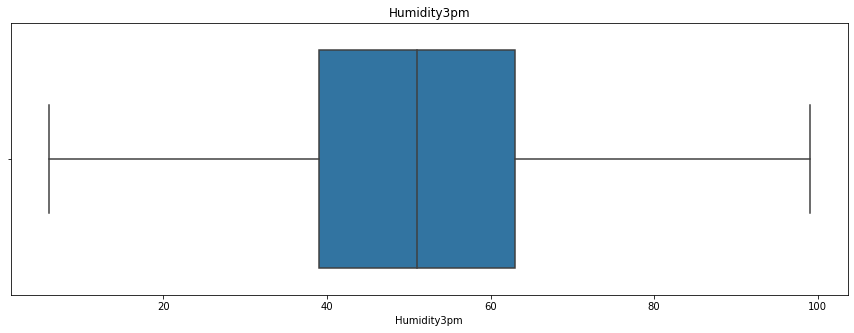

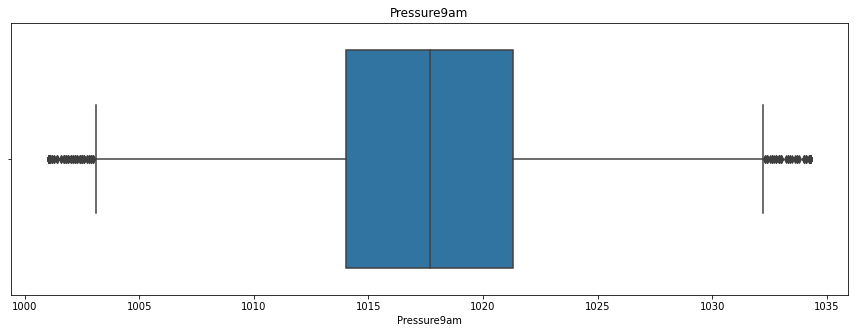

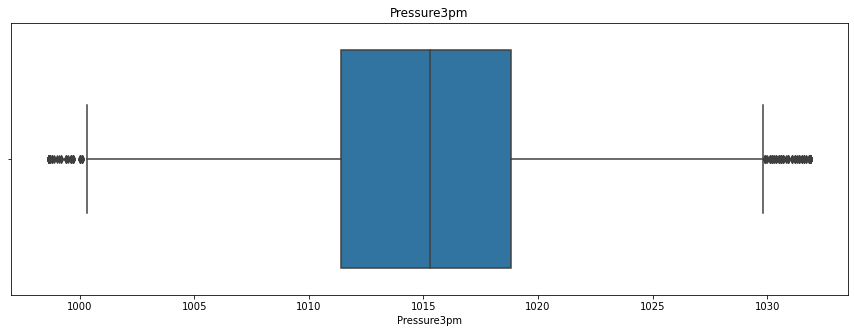

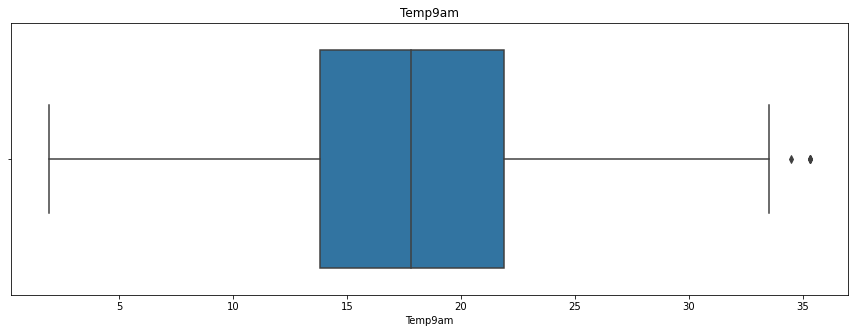

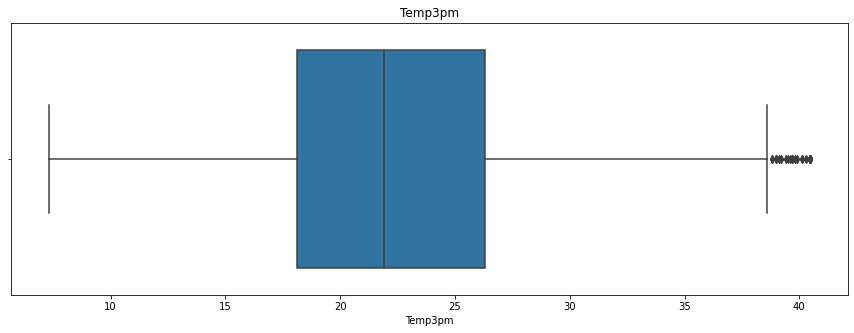

<Figure size 1080x360 with 0 Axes>

In [67]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,5));

In [68]:
def qq_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show();

MinTemp


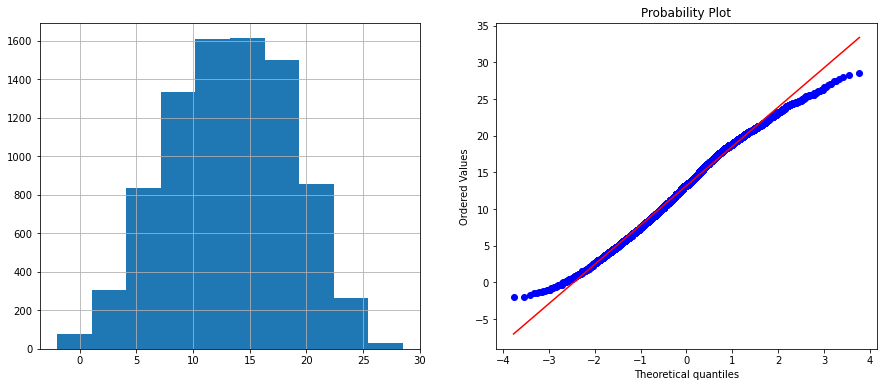

MaxTemp


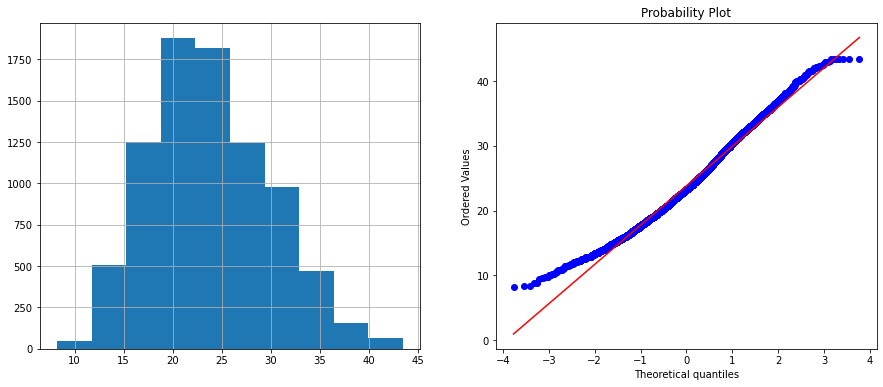

Rainfall


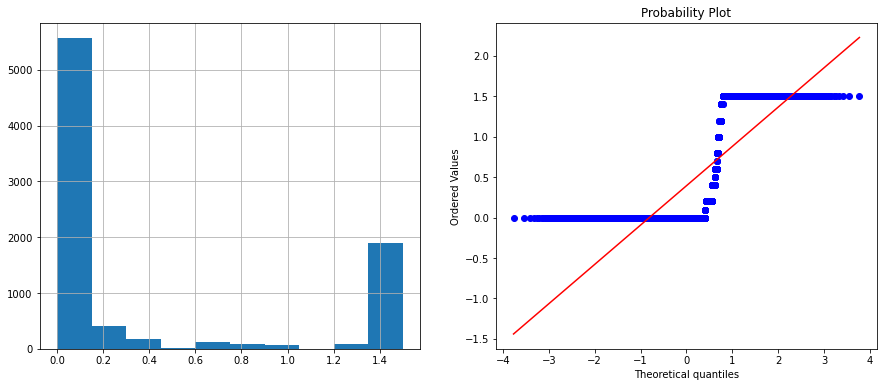

Evaporation


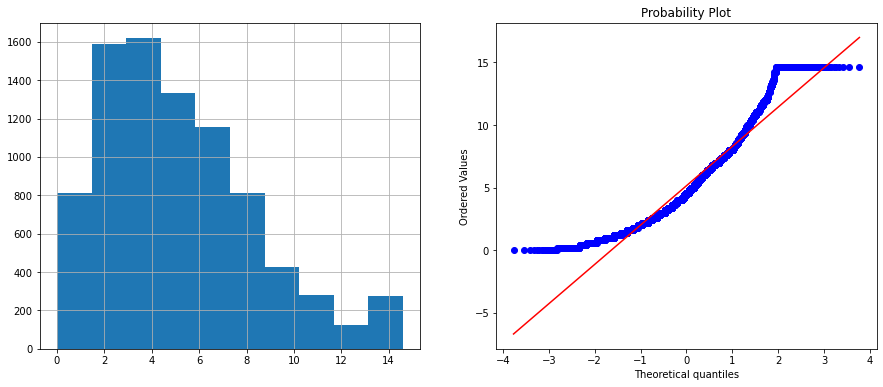

Sunshine


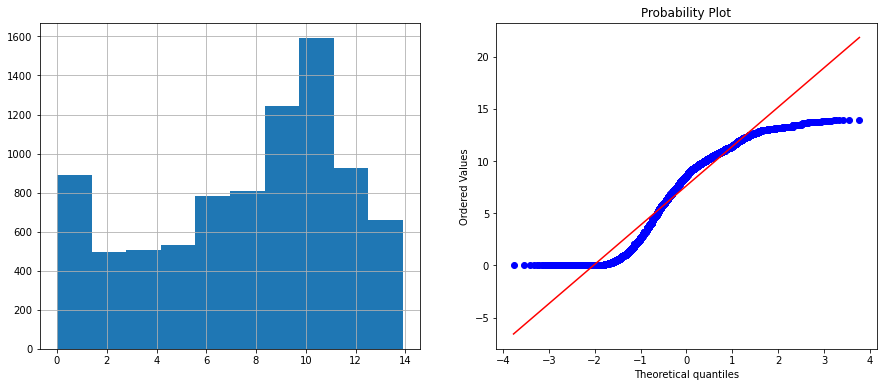

WindGustSpeed


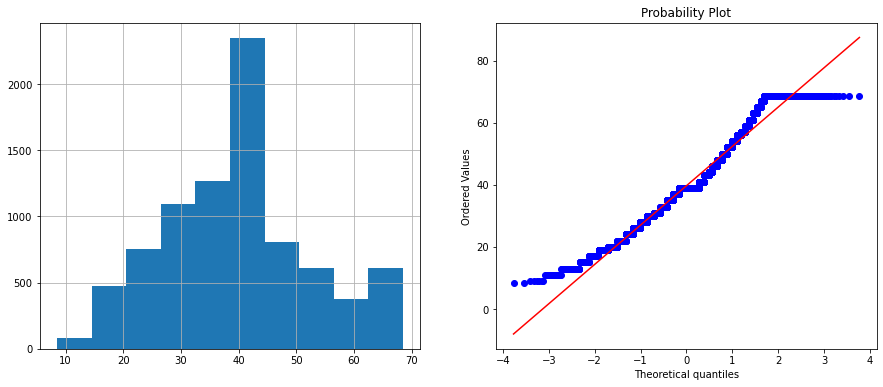

WindSpeed9am


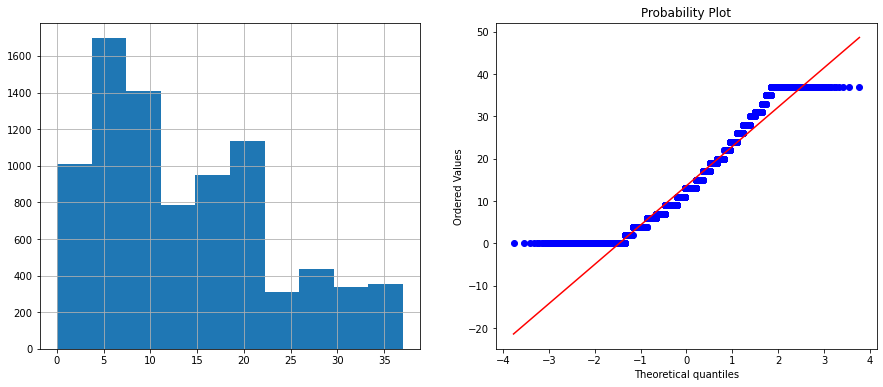

WindSpeed3pm


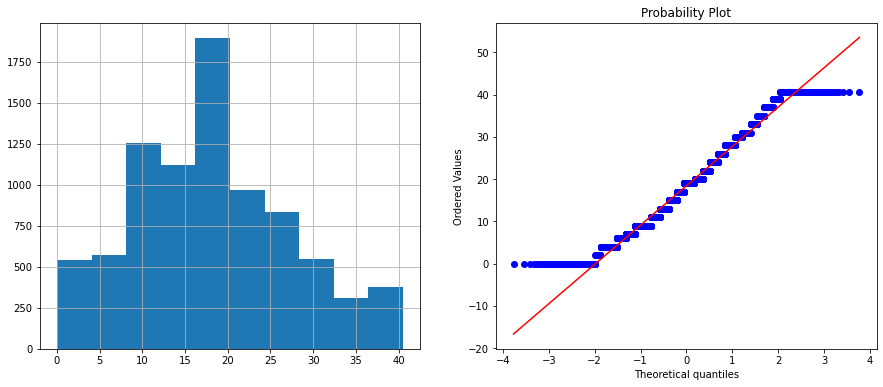

Humidity9am


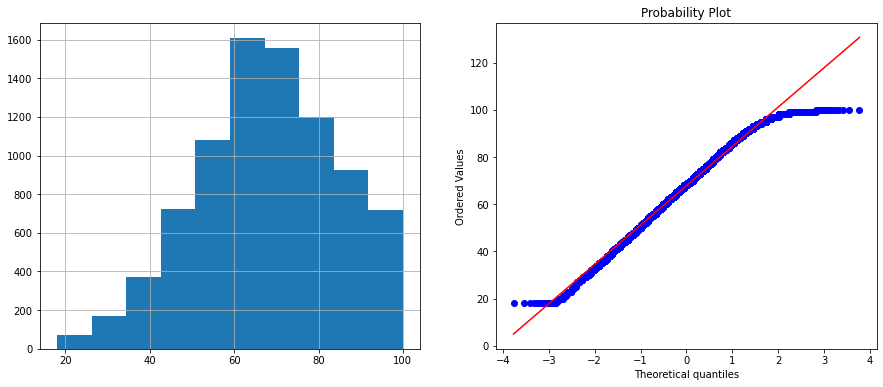

Humidity3pm


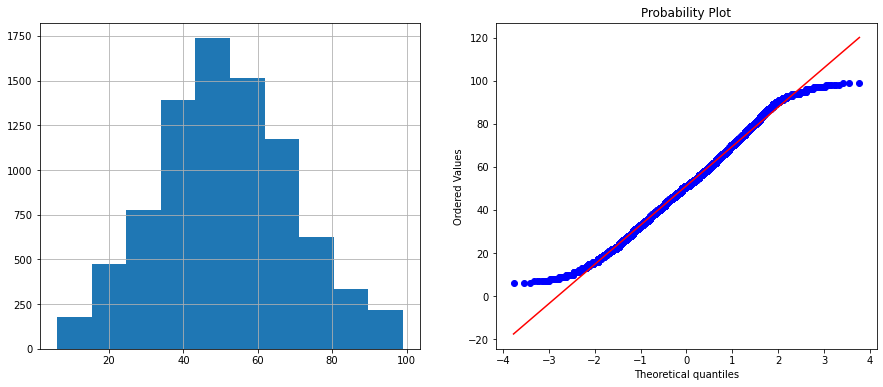

Pressure9am


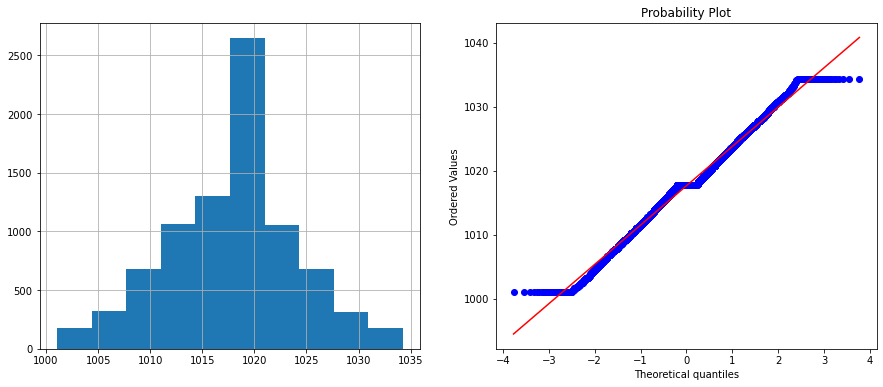

Pressure3pm


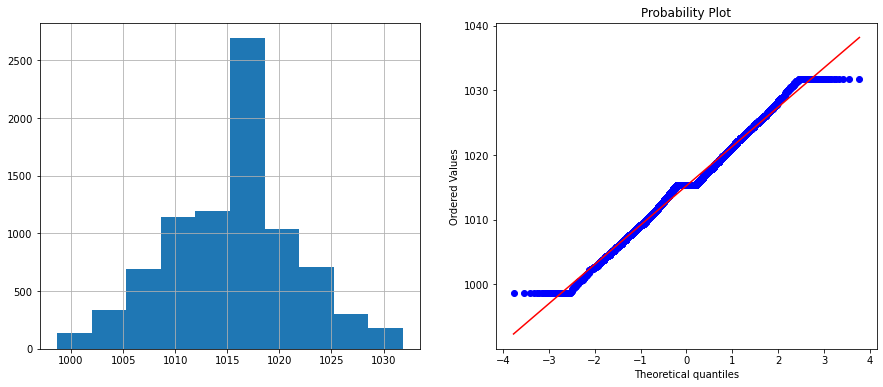

Temp9am


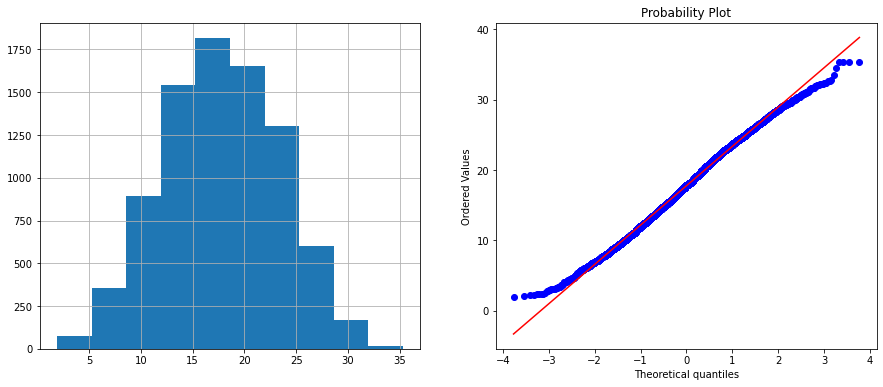

Temp3pm


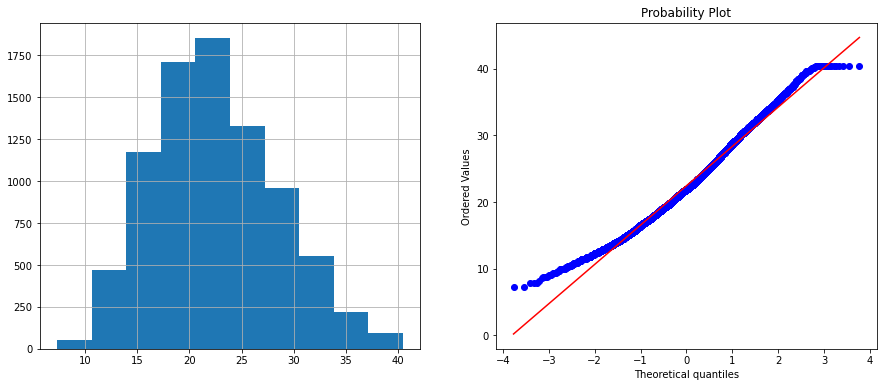

In [69]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show();

In [70]:
df.to_csv("preprocessed_1.csv", index=False)

In [71]:
x = df.drop(["RainTomorrow", "Date"], axis=1)
y = df["RainTomorrow"]

In [72]:
x

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0           30     13.4     22.9       0.6          3.0      13.8   
1           30      7.4     25.1       0.0          2.2       7.6   
2           30     12.9     25.7       0.0          4.6       7.7   
3           30      9.2     28.0       0.0          1.8       8.0   
4           30     17.5     32.3       1.0          3.8      11.9   
...        ...      ...      ...       ...          ...       ...   
8420        49      2.8     23.4       0.0          6.4       1.2   
8421        49      3.6     25.3       0.0         12.6       7.1   
8422        49      5.4     26.9       0.0          4.2      13.0   
8423        49      7.8     27.0       0.0          4.0      13.1   
8424        49     14.9     23.3       0.0          8.4       4.4   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity3pm  \
0             4.0           44.0         5.0         3.0  ...         22.0   
1             2.0           44.0         0.0         6.0  ...         25.0   
2             5.0           46.0         5.0         6.0  ...         30.0   
3            11.0           24.0        13.0        14.0  ...         16.0   
4             4.0           41.0        12.0         0.0  ...         33.0   
...           ...            ...         ...         ...  ...          ...   
8420         15.0           31.0        13.0        13.0  ...         24.0   
8421          0.0           22.0        13.0         2.0  ...         21.0   
8422          3.0           37.0        13.0         3.0  ...         24.0   
8423         12.0           28.0        11.0         2.0  ...         24.0   
8424          3.0           39.0        14.0        15.0  ...         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       8.0     16.9     21.8   
1          1010.6       1007.8       1.0       4.0     17.2     24.3   
2          1007.6       1008.7       2.0       2.0     21.0     23.2   
3          1017.6       1012.8       8.0       7.0     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       8.0       4.0     10.1     22.4   
8421       1023.5       1019.1       1.0       1.0     10.9     24.5   
8422       1021.0       1016.8       6.0       5.0     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  Date_month  Date_day  
0             0          12         1  
1             0          12         2  
2             0          12         3  
3             0          12         4  
4             0          12         5  
...         ...         ...       ...  
8420          0           6        21  
8421          0           6        22  
8422          0           6        23  
8423          0           6        24  
8424          0           6        25  

[8425 rows x 23 columns]

### standard Scaling

In [73]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x


Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0     0.697597  0.038248 -0.156288  0.328811    -0.662619  1.582770   
1     0.697597 -1.077164  0.203684 -0.631075    -0.909043 -0.007275   
2     0.697597 -0.054703  0.301858 -0.631075    -0.169770  0.018371   
3     0.697597 -0.742540  0.678192 -0.631075    -1.032255  0.095308   
4     0.697597  0.800447  1.381773  0.968734    -0.416194  1.095498   
...        ...       ...       ...       ...          ...       ...   
8420  3.256144 -1.932313 -0.074476 -0.631075     0.384685 -1.648612   
8421  3.256144 -1.783591  0.236408 -0.631075     2.294475 -0.135505   
8422  3.256144 -1.448968  0.498206 -0.631075    -0.292982  1.377603   
8423  3.256144 -1.002803  0.514568 -0.631075    -0.354588  1.403248   
8424  3.256144  0.317101 -0.090839 -0.631075     1.000747 -0.827944   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity3pm  \
0       -0.681815       0.335273   -0.278307   -1.124722  ...    -1.597239   
1       -1.134477       0.335273   -1.365745   -0.433496  ...    -1.433401   
2       -0.455483       0.490926   -0.278307   -0.433496  ...    -1.160339   
3        0.902505      -1.221256    1.461594    1.409772  ...    -1.924914   
4       -0.681815       0.101793    1.244107   -1.815947  ...    -0.996501   
...           ...            ...         ...         ...  ...          ...   
8420     1.807830      -0.676471    1.461594    1.179363  ...    -1.488014   
8421    -1.587140      -1.376909    1.461594   -1.355130  ...    -1.651851   
8422    -0.908146      -0.209512    1.461594   -1.124722  ...    -1.488014   
8423     1.128836      -0.909951    1.026619   -1.355130  ...    -1.488014   
8424    -0.908146      -0.053860    1.679082    1.640180  ...    -0.832664   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
0       -1.610482    -1.331695  1.188369  1.283648 -0.153693 -0.106696   
1       -1.141264    -1.217361 -1.244683 -0.182260 -0.100173  0.314589   
2       -1.626662    -1.070361 -0.897104 -0.915214  0.577746  0.129224   
3       -0.008669    -0.400695  1.188369  0.917171  0.060387  0.685320   
4       -1.108904    -1.511361  0.840790  1.283648  0.006867  1.224565   
...           ...          ...       ...       ...       ...       ...   
8420     1.123926     0.824305  1.188369 -0.182260 -1.366811 -0.005587   
8421     0.945947     0.628305 -1.244683 -1.281691 -1.224092  0.348292   
8422     0.541449     0.252638  0.493211  0.184217 -0.938652  0.617914   
8423     0.282570     0.203638 -0.549525 -0.915214 -0.474812  0.601063   
8424     0.412009     0.432305  1.188369  1.283648 -0.492652 -0.258358   

      RainToday  Date_month  Date_day  
0     -0.556099    1.616696 -1.677733  
1     -0.556099    1.616696 -1.563926  
2     -0.556099    1.616696 -1.450120  
3     -0.556099    1.616696 -1.336313  
4     -0.556099    1.616696 -1.222506  
...         ...         ...       ...  
8420  -0.556099   -0.128611  0.598400  
8421  -0.556099   -0.128611  0.712207  
8422  -0.556099   -0.128611  0.826013  
8423  -0.556099   -0.128611  0.939820  
8424  -0.556099   -0.128611  1.053627  

[8425 rows x 23 columns]

### Feature Importance

In [74]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)

ExtraTreesClassifier()

In [75]:
print(extra.feature_importances_)

[0.03493499 0.03672862 0.03634073 0.05941102 0.03311201 0.04433919
 0.03433223 0.05233909 0.03385712 0.03401202 0.03605225 0.03719262
 0.04976821 0.11918425 0.03918948 0.04026117 0.04036664 0.05402959
 0.03565545 0.03991587 0.03795748 0.03518216 0.03583781]


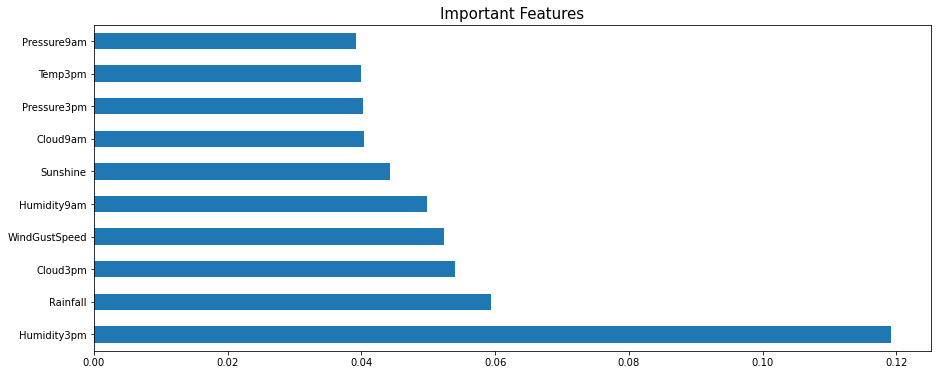

In [76]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

### Model Building

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc,plot_roc_curve
from imblearn.combine import SMOTEENN

In [78]:
#over sampling of our Data
sm=SMOTEENN()
x_resample,y_resample=sm.fit_resample(x,y)
x_resample

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0      0.697597  0.038248 -0.156288  0.328811    -0.662619  1.582770   
1      0.697597 -1.077164  0.203684 -0.631075    -0.909043 -0.007275   
2      0.697597 -0.054703  0.301858 -0.631075    -0.169770  0.018371   
3      0.697597 -0.742540  0.678192 -0.631075    -1.032255  0.095308   
4      0.697597  0.205560  0.187321 -0.631075    -1.155468  0.197892   
...         ...       ...       ...       ...          ...       ...   
10246  0.428276  1.358153  0.498206  1.768638    -0.724225 -0.340672   
10247  0.870299 -0.008805 -0.144548 -0.631075    -0.067437  1.179680   
10248 -0.344106  1.428181  1.621955  0.592412     0.486194 -0.097765   
10249  0.428276 -1.021393 -1.465277  1.768638    -1.340286 -0.571485   
10250 -0.783667  1.055310  0.020534  1.768638    -0.527469 -1.279651   

       WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity3pm  \
0        -0.681815       0.335273   -0.278307   -1.124722  ...    -1.597239   
1        -1.134477       0.335273   -1.365745   -0.433496  ...    -1.433401   
2        -0.455483       0.490926   -0.278307   -0.433496  ...    -1.160339   
3         0.902505      -1.221256    1.461594    1.409772  ...    -1.924914   
4        -0.681815       0.802231    0.156669   -0.894313  ...    -1.761076   
...            ...            ...         ...         ...  ...          ...   
10246    -0.908146       2.242021   -0.060819    0.488138  ...     0.914936   
10247    -0.151149       1.237531    0.143153   -0.678223  ...    -0.936642   
10248    -0.012788       0.750823   -0.627085   -1.355130  ...    -0.288944   
10249    -0.002821       0.957884   -0.060819    0.027321  ...     0.696486   
10250    -0.908146      -0.053860   -1.120191    0.488138  ...     0.411096   

       Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
0        -1.610482    -1.331695  1.188369  1.283648 -0.153693 -0.106696   
1        -1.141264    -1.217361 -1.244683 -0.182260 -0.100173  0.314589   
2        -1.626662    -1.070361 -0.897104 -0.915214  0.577746  0.129224   
3        -0.008669    -0.400695  1.188369  0.917171  0.060387  0.685320   
4        -1.303064    -1.152028 -1.244683  0.550694  0.060387  0.365143   
...            ...          ...       ...       ...       ...       ...   
10246    -2.629818    -1.838028  1.188369 -0.182260  0.488547  0.146075   
10247    -0.793442    -0.460953  0.677801  0.012366 -0.083339 -0.231035   
10248    -0.326983    -0.421763  0.840790  0.917171  0.928261  1.401767   
10249     0.848867     1.477638  0.798564 -1.014556 -1.670091 -1.657025   
10250     0.007511     0.007638  1.098662  0.869879  0.374030  0.098786   

       RainToday  Date_month  Date_day  
0      -0.556099    1.616696 -1.677733  
1      -0.556099    1.616696 -1.563926  
2      -0.556099    1.616696 -1.450120  
3      -0.556099    1.616696 -1.336313  
4      -0.556099    1.616696 -0.994893  
...          ...         ...       ...  
10246   1.798240   -1.583033 -0.198246  
10247  -0.556099    1.325812  0.911531  
10248  -0.556099    1.616696 -0.782315  
10249   1.798240   -0.419495 -0.198246  
10250   1.798240   -1.038802 -0.473602  

[10251 rows x 23 columns]

In [79]:
def max_accuracy_score(clf,x,y):
    max_accuracy=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=.20,random_state=i,stratify=y_resample) 
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy*100)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean()*100)
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std()*100)
    print('\n')
    print('F1 score',f1_score(y_test,pred)*100)
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred)*100)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    return final_r

### Logistic Regression

max accuracy score corresponding to 46 is 85.03169185763042


cross validation score 82.39762611275964


Standard Deviation 3.089384187483515


F1 score 86.17065994115175


Training accuracy 83.53658536585365


Test Accuracy 83.95904436860067


Confusion Matrix [[ 697  151]
 [ 178 1025]]


Classification Report               precision    recall  f1-score   support

           0       0.80      0.82      0.81       848
           1       0.87      0.85      0.86      1203

    accuracy                           0.84      2051
   macro avg       0.83      0.84      0.84      2051
weighted avg       0.84      0.84      0.84      2051



Roc_auc Score 83.69852687463731





46

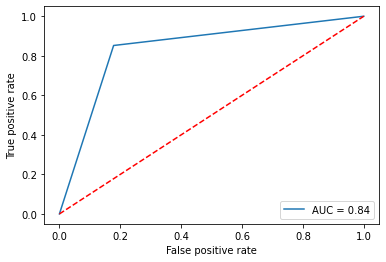

In [80]:
lr = LogisticRegression()
max_accuracy_score(lr,x,y)

### Decision Tree

max accuracy score corresponding to 47 is 91.6138469039493


cross validation score 77.459940652819


Standard Deviation 2.8610019687107306


F1 score 91.91666666666666


Training accuracy 100.0


Test Accuracy 90.54119941491955


Confusion Matrix [[ 754   94]
 [ 100 1103]]


Classification Report               precision    recall  f1-score   support

           0       0.88      0.89      0.89       848
           1       0.92      0.92      0.92      1203

    accuracy                           0.91      2051
   macro avg       0.90      0.90      0.90      2051
weighted avg       0.91      0.91      0.91      2051



Roc_auc Score 90.30127119308646





47

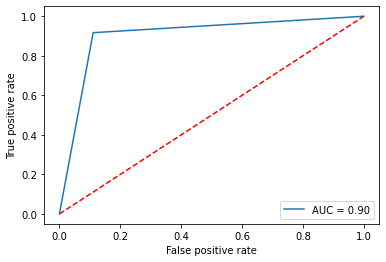

In [81]:
dt = DecisionTreeClassifier()
max_accuracy_score(dt,x,y)

### KNN

max accuracy score corresponding to 46 is 96.87957094100439


cross validation score 79.66765578635015


Standard Deviation 1.84744257082983


F1 score 96.27831715210357


Training accuracy 97.8170731707317


Test Accuracy 95.51438322769381


Confusion Matrix [[ 769   79]
 [  13 1190]]


Classification Report               precision    recall  f1-score   support

           0       0.98      0.91      0.94       848
           1       0.94      0.99      0.96      1203

    accuracy                           0.96      2051
   macro avg       0.96      0.95      0.95      2051
weighted avg       0.96      0.96      0.95      2051



Roc_auc Score 94.80166525510124





46

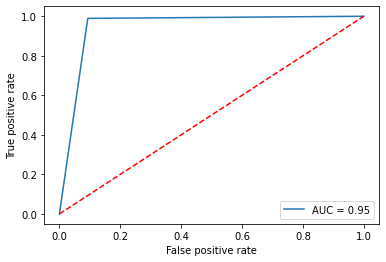

In [82]:
knn = KNeighborsClassifier()
max_accuracy_score(knn,x,y)

### Naive Bayes

max accuracy score corresponding to 87 is 81.17991223793271


cross validation score 77.29376854599407


Standard Deviation 4.887354761119082


F1 score 81.17081695063347


Training accuracy 80.14634146341464


Test Accuracy 78.98586055582642


Confusion Matrix [[691 157]
 [274 929]]


Classification Report               precision    recall  f1-score   support

           0       0.72      0.81      0.76       848
           1       0.86      0.77      0.81      1203

    accuracy                           0.79      2051
   macro avg       0.79      0.79      0.79      2051
weighted avg       0.80      0.79      0.79      2051



Roc_auc Score 79.35472835207578





87

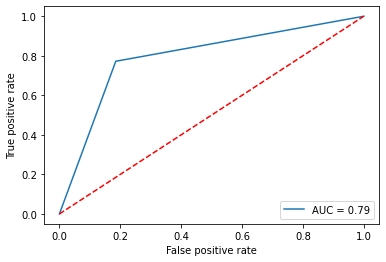

In [83]:
gnb = GaussianNB()
max_accuracy_score(gnb,x,y)

### Random Forest

max accuracy score corresponding to 53 is 96.73330082886396


cross validation score 85.76854599406529


Standard Deviation 0.9311268205319988


F1 score 96.93454846727423


Training accuracy 100.0


Test Accuracy 96.39200390053632


Confusion Matrix [[ 807   41]
 [  33 1170]]


Classification Report               precision    recall  f1-score   support

           0       0.96      0.95      0.96       848
           1       0.97      0.97      0.97      1203

    accuracy                           0.96      2051
   macro avg       0.96      0.96      0.96      2051
weighted avg       0.96      0.96      0.96      2051



Roc_auc Score 96.21097609749212





53

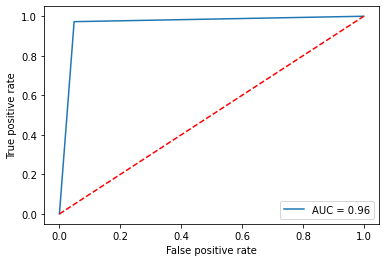

In [84]:
rf = RandomForestClassifier()
max_accuracy_score(rf,x,y)

### Ada Boost

max accuracy score corresponding to 44 is 87.61579717211117


cross validation score 81.2106824925816


Standard Deviation 2.723408447162552


F1 score 87.36797634136036


Training accuracy 87.0


Test Accuracy 85.42174549000488


Confusion Matrix [[ 718  130]
 [ 169 1034]]


Classification Report               precision    recall  f1-score   support

           0       0.81      0.85      0.83       848
           1       0.89      0.86      0.87      1203

    accuracy                           0.85      2051
   macro avg       0.85      0.85      0.85      2051
weighted avg       0.86      0.85      0.85      2051



Roc_auc Score 85.31079925971237





44

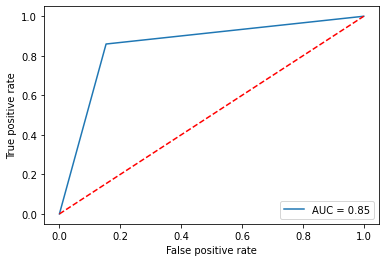

In [85]:
adb = AdaBoostClassifier()
max_accuracy_score(adb,x,y)

### Gradient Boost

max accuracy score corresponding to 72 is 91.07752315943442


cross validation score 81.54302670623146


Standard Deviation 3.5512432746448255


F1 score 91.19732999582811


Training accuracy 92.0


Test Accuracy 89.71233544612383


Confusion Matrix [[ 747  101]
 [ 110 1093]]


Classification Report               precision    recall  f1-score   support

           0       0.87      0.88      0.88       848
           1       0.92      0.91      0.91      1203

    accuracy                           0.90      2051
   macro avg       0.89      0.89      0.89      2051
weighted avg       0.90      0.90      0.90      2051



Roc_auc Score 89.47290774635738





72

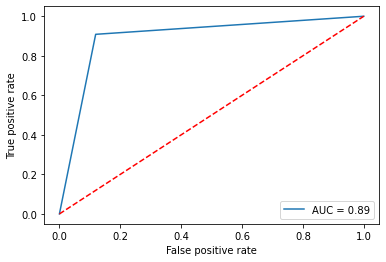

In [86]:
gb = GradientBoostingClassifier()
max_accuracy_score(gb,x,y)

### Let's check ROC_AUC curve for fitted models:

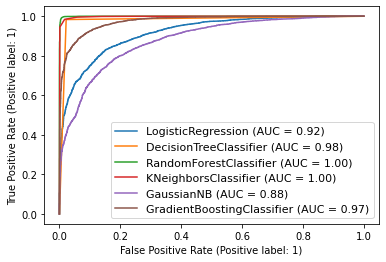

In [87]:
disp = plot_roc_curve(lr,x_resample,y_resample)
plot_roc_curve(dt,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(rf,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(knn,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(gnb,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(gb,x_resample,y_resample,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show();

### Hyperparameter Tuning

In [88]:
X_resampled, y_resampled = sm.fit_resample(x,y)
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,random_state=78,test_size=.20,stratify=y_resampled)

grid_param={'n_estimators':[12,13,15,17],
       'criterion':['entropy','gini'],
       'max_depth':[10,13,15,17],
       'min_samples_split':[10,12,11,13],
       'min_samples_leaf':[4,5,6,8]}

grid = GridSearchCV(rf,param_grid = grid_param)
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 17,
 'min_samples_leaf': 5,
 'min_samples_split': 11,
 'n_estimators': 17}

In [89]:
rf_fin_clf =RandomForestClassifier(criterion='entropy',max_depth=15,min_samples_leaf=4,min_samples_split=10,n_estimators=15)
rf_fin_clf.fit(x_train,y_train)
pred=rf_fin_clf.predict(x_train)
rf_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")
      
#####################TestScore##########################   
      
pred=rf_fin_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n=======================Test Result===========================")
print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n")      
      


=======================Train Result===========================
Accuracy score:98.55%
_______________________________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.989362     0.982805  0.985507     0.986083      0.985545
recall        0.975809     0.992469  0.985507     0.984139      0.985507
f1-score      0.982539     0.987613  0.985507     0.985076      0.985493
support    3431.000000  4780.000000  0.985507  8211.000000   8211.000000
________________________________________________________________
 Confusion Matrix:
[[3348   83]
 [  36 4744]]


=======================Test Result===========================
Accuracy score:93.47%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.924883     0.941715   0.93473     0.933299      0.934680
recall       0.918415     0.946444

### check the classification report for that.

In [90]:
Report = classification_report(y_test,pred)
print(Report)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       858
           1       0.94      0.95      0.94      1195

    accuracy                           0.93      2053
   macro avg       0.93      0.93      0.93      2053
weighted avg       0.93      0.93      0.93      2053



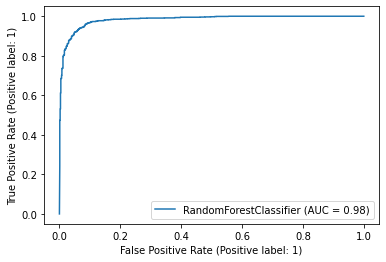

In [91]:
disp = plot_roc_curve(rf_fin_clf,x_test,y_test)

In [92]:
x_predict = list (rf_fin_clf.predict(x_test))
rf_clf_insu = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(rf_clf_insu))

      predicted_values  orignal_values
2493                 0               0
716                  0               0
8753                 1               1
6507                 0               1
389                  0               0
...                ...             ...
5238                 1               1
9622                 1               1
9652                 1               1
6915                 1               1
720                  0               0

[2053 rows x 2 columns]


### Saving The Model

In [93]:
import joblib
joblib.dump(rf_fin_clf,"rand_clf_rainfall.pkl")

['rand_clf_rainfall.pkl']

### Loading Model

In [94]:
rf_from_joblib = joblib.load('rand_clf_rainfall.pkl')
rf_from_joblib.predict(x_test)

array([0, 0, 1, ..., 1, 1, 0], dtype=uint8)